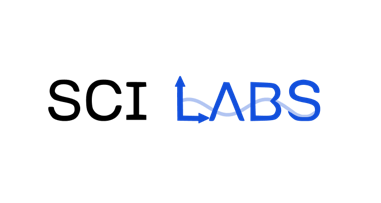

**Smerodajná odchylka**

Každé fyzikálne meranie je ovplyvnené chybami, ktoré majú rôzny pôvod. Môže sa jednať o chybu prístroja, meracej metódy, alebo je chybne nastavený celý experiment. Ak sú chyby spôsobené náhodnými a nepredvídateľnými fluktuáciami a namerané hodnoty sú rovnomerne rozprestrené okolo priemernej hodnoty, hovoríme im náhodné chyby. Ak sa každé zo série meraní vychýli tým istým smerom, hovoríme o systematickej chybe.

Kvôli tomu, je potrebné udávať nie len nameranú hodnotu, ale takisto aj chybu. Napríklad, nameraná dĺžka objektu môže byť $8.2 \pm 0.1~\rm{cm}$, čo znamená, že s veľkou pravdepodobnosťou môže byť objekt dlhý aj $8.3~\rm{cm}$ ale aj $8.1~\rm{cm}$.

Na pokuse, pri ktorom odmeriame veľkosť magnetického poľa na danom mieste si ukážeme, ako spracovať meranie tak, aby sme vedeli s akou presnosťou sme meranie uskutočnili. Vezmite senzor, držte ho vo vzduchu na mieste, kde by ste chceli poznať hodnotu magnetického poľa a začnite nahrávanie merania. Po istú dobu pomaly otáčajte senzor na mieste všetkými smermi, ale pokúste sa ho nevychyľovať do strán. To je potrebné, aby sme sa vyhli systematickej chybe v prípade, že by senzor meral veľkosť magnetického poľa rôzne v závislosti na naklonení. To sa môže stať v prípade zlej kalibrácie prístroja. Vykreslite časový priebeh zložiek senzora.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

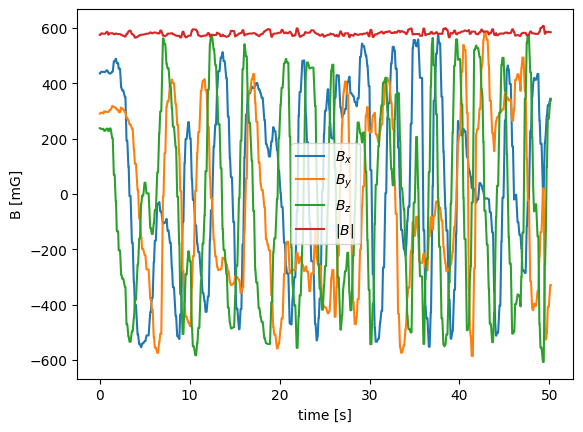

In [2]:
df1 = pd.read_excel(r"/content/mag_std_dev.xlsx")
format = '%Y-%m-%d %H:%M:%S.%f'

# ulozenie prislusnych stlpcov do vektorov

t0 = datetime.strptime(df1.iloc[0,0], format).timestamp()
time = np.array([datetime.strptime(x, format).timestamp() for x in df1.iloc[:, 0] ])[0:-1] - t0
b_x = np.array(df1.iloc[:, 10][0:-1] )
b_y = np.array(df1.iloc[:, 11][0:-1] )
b_z = np.array(df1.iloc[:, 12][0:-1] )
b = np.sqrt(b_x**2 + b_y**2 + b_z**2)

plt.plot(time,b_x,label='$B_x$')
plt.plot(time,b_y,label='$B_y$')
plt.plot(time,b_z,label='$B_z$')
plt.plot(time,b,label='$|B|$')
plt.xlabel('time [s]')
plt.ylabel('B [mG]')

plt.legend()

Vidíme, že zložky oscilujú medzi maximom a minimom v závislosti od toho, ako bol senzor natočený. To je spôsobené tým, že senzor meria smer magnetického poľa vzhľadom na súradnicovú os spojenú so senzorom. To, že sme senzorom otáčali neznamená, že sa menil smer vektoru magnetického poľa, ale otáčala sa súradnicová os spojená so senzorom. Červená krivka znázorňuje veľkosť magnetického poľa a vidíme, že osciluje okolo konštantnej hodnoty, čo znamená, že senzor je dobre vykalibrovaný a veľkosť vektora sa viditeľne nelíši v závislosti na natočení. Poďme sa pozrieť na namerané magnetické pole viac detailne.

Text(0, 0.5, 'B [mG]')

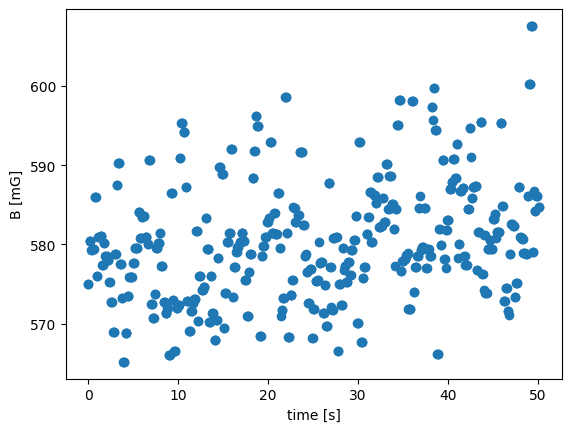

In [3]:
plt.scatter(time,b,label='$|B|$')
plt.xlabel('time [s]')
plt.ylabel('B [mG]')

Vidíme, že namerané hodnoty oscilujú a presnosť prístroja nie je dokonalá, čo je prirodzená vlasnosť každého meradla. Meraní máme teda vacero, každé má inú hodnotu ale ako výstup potrebujeme vybrať jednu hodnotu, ktorá sériu meraní reprezentuje najlepšie. Na to nám poslúži aritmetický priemer

$\overline{ B } = \frac{1}{N} \sum_{i=1}^N B_i = \frac{1}{N}(B_1 + B_2 + B_3 + ... + B_{N-1} + B_{N})$.

V tomto zápise znamená $N$ počet meraní. Inými slovami, aritmetický priemer spočítame ako súčet všetkých nameraných hodnôt, vydelený ich počtom. V pythone môžme využiť predpripravené funkcie z knižnice *numpy* a to buď priamo funkciu "average" alebo pomocou funkcie "sum".



In [ ]:
priemer1 = np.average(b) # preddefinovana funkcia na aritmeticky priemer
print(priemer1)

N = len(b) # dlzka vektora b, cize pocet nameranych hodnot
suma = np.sum(b) # preddefinovana funkcia na sumu
priemer2 = suma/N
print(priemer2)

580.3711061345028
580.3711061345028


Vieme však, že priemerná hodnota sama o sebe veľa nenapovie a potrebujeme určiť chybu merania. To vieme pomocou surčenia veličiny, ktorá sa nazýva smerodajná odchylka a ktorá je definovaná ako

$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (B_i-\overline{B})^2} = \frac{1}{\sqrt{N}}\sqrt{(B_1-\overline{B})^2 + (B_2-\overline{B})^2 + .. + (B_N-\overline{B})^2}$

Spočítať ju môžme opäť podľa preddefinovanej funkcie, ktorá sa v numpy knižnici nazýva std, alebo hodnotu môžme spočítať manuálne.

In [ ]:
smer_od1 = np.std(b) # pouzitie predpripravenej kniznice
print(smer_od1)

priem = np.average(b) # spocitanie priemeru
N = len(b) # pocet merani
suma_stvorcov = np.sum((b-priem)**2) # suma vyrazu pod odmocninou
smer_od2 = 1/np.sqrt(N) * np.sqrt(suma_stvorcov) # dosadenie do vzorca pre smerodajnu odchylku
print(smer_od2)

7.499119474243266
7.499119474243265


Po zaokrúhlení chyby na jednu platnú číslicu dostávame výsledok v tvare $B=580 \pm 7 \rm{mG}$. Čo však tento zápis presne znamená? Lepšie porozumenie vieme získať, ak vykreslíme namerané hodnoty spolu s priemernou hodnotou a maximálnou/minimálnou hodnotou.

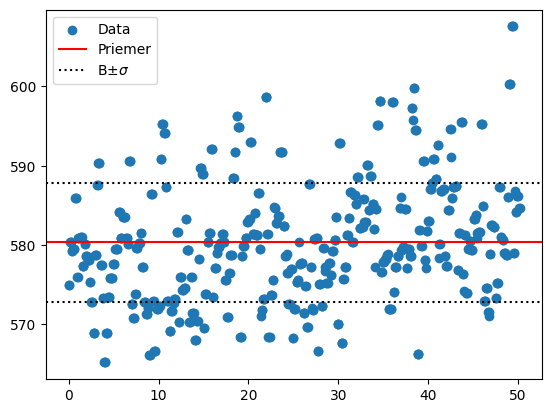

In [ ]:
plt.scatter(time,b, label = 'Data')
plt.axhline(y =priemer1 ,color = 'red', label = 'Priemer' )
plt.axhline(y =priemer1 + smer_od1 ,color = 'black', label = 'B$\pm \sigma$',linestyle=':' )
plt.axhline(y =priemer1 - smer_od1 ,color = 'black',linestyle=':' )
plt.legend()

Vidíme, že nie všetky namerané dáta sa nachádzajú vo oblasti $B\pm \sigma$ vymedzenej bodkovanými čiarami, a je to správne. Podľa definície by sa malo v intervale $B\pm \sigma$ nachadzať 68.2% hodnôt. Hodnota smerodajnej odchýlky teda znamená, že ak by sme vykonali ďalšie meranie, máme 62.8 percentnú šancu, že nameraná hodnota nebude od priemeru vzdialená o viac ako $\sigma$. To si vieme nasledovna overiť.

BONUSOVÁ ÚLOHA:

Spočítajte, koľko percent meraní sa nachádza v intervale $B \pm \sigma$ a koľko mimo neho.

In [ ]:
inside = 0 # inicializujeme si pocitadlo bodov vnutri intervalu
outside = 0 # inicializujeme si pocitadlo bodov mimo intervalu
for i in b: # pomocou for cyklu budeme prechadzat vsetky namerane hodnoty B
  if abs(i-priem)>smer_od1: # podmienka ktora urci, ci je namerana hodnota B (v kode ulozena ako i) vzdialena od priemeru dalej ako sigma
    outside = outside + 1 # ak ano, pripocitame +1 k pocitadlu bodov mimo intervalu
  else:
    inside = inside +1 # ak nie, pripocitame +1 k pocitadlu bodov vo vnutri intervalu

N = len(b) # pocet merani
percent_inside = inside / N * 100
percent_outside = outside / N * 100

print('V intervale sa nachadza', inside, 'merani z', N ,'co predstavuje', "%.2f" % round(percent_inside, 2), "percent")
print('Mimo intervalu sa nachadza', outside, 'merani z', N ,'co predstavuje', "%.2f" % round(percent_outside, 2), "percent")

V intervale sa nachadza 463 merani z 677 co predstavuje 68.39 percent
Mimo intervalu sa nachadza 214 merani z 677 co predstavuje 31.61 percent


Vidíme, že aj tak náhodná vec ako sú chyby merania, ktorú nevieme ovplyvniť a môže závisieť na mnohých faktoroch nie je úplne náhodná a vieme ju popísať pomocou štatistiky. Hodnota 68.2 percent nie je náhodná a je to dôsledok pravidiel, podľa ktorých sa náhodné javy správajú. Na hlbšie pochopenie si študenti budú musieť počkať na vysokoškolské prednášky z štatistiky, poprípade štatistickej fyziky. Na intuitívne pochopenie môže poslúžiť nasledujúce video. https://www.youtube.com/watch?v=EvHiee7gs9Y&ab_channel=FourPinesPublishing


**Rozdelenie náhodných hodnôt**

Ďalší spôsob ako sa pozrieť na namerané dáta a na rozdelenie náhodne nameranej chyby je pomocou histogramu. V predchádzajúcej analýze sme videli, že väčšina nameraných hodnôt má hodnotu blízku aritmetickému priemeru. Čím je hodnota od aritmetického priemeru vzdialenejšia tým častejšie ju nameráme. Inými slovami, ak je tyč dlhá 10 cm, je veľmi pravdepodobné že pri opakovanom meraní nameráme hodnotu 9.8 cm, zatiaľ čo nameranie hodnoty 8 cm je oveľa menej pravdepodobné. Pomocou histogramu si ukážeme, že naše namerané dáta velkosti magnetického poľa sa riadia tými istými pravidlami.

Text(0, 0.5, 'Počet meraní v intervale')

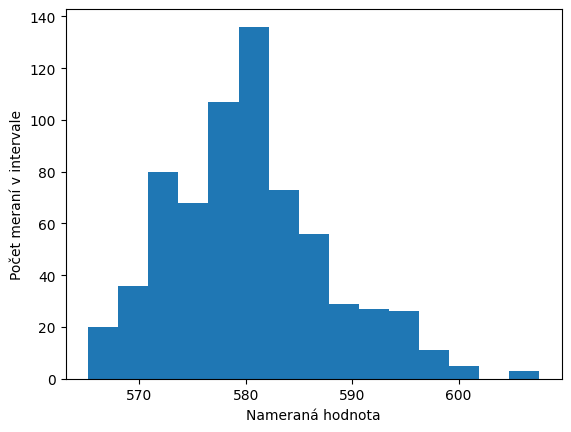

In [ ]:
plt.hist(b,bins=15)
plt.xlabel('Nameraná hodnota')
plt.ylabel('Počet meraní v intervale')

Vidíme, že najviac hodnôt bolo nameraných v okolí aritmetického priemeru okolo 580, čo súhlasí so spočítanou hodnou pár riadkov vyššie. Už iba pre zaujímavosť spomenieme, že ak by sme zvyšovali počet nameraných hodnôt, rozdelenie meraní by kopírovalo krivku pod nasledujúcim grafom. Aj napriek malému množstvu meraní vidíme, že nami napočítané hodnoty dávajú dobré predpovede.

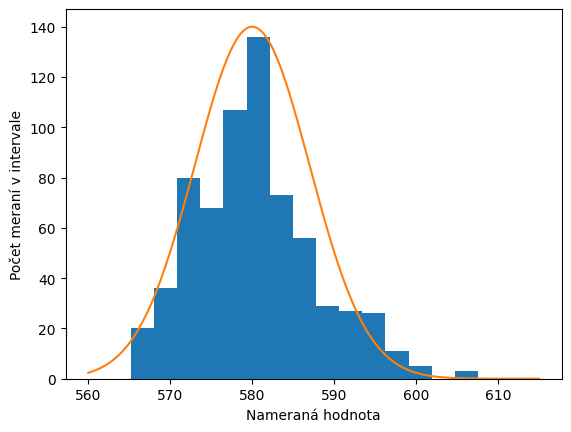

In [ ]:
# namerane hodnoty z prechadzajucej analyzy
priemer = 580
odchylka = 7

plt.hist(b,bins=15)
plt.xlabel('Nameraná hodnota')
plt.ylabel('Počet meraní v intervale')

x = np.linspace(560,615,300)
y = np.exp(-(x-priemer)**2/(2*odchylka**2)) * 140
plt.plot(x,y)